In [31]:
import MeanderPy as mp
import matplotlib.pyplot as plt

## Input parameters

In [24]:
W = 200.0                    # channel width (m)
D = 16.0                     # channel depth (m)
pad = 100                    # padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline
nit = 1500                   # number of iterations
Cf = 0.03                    # dimensionless Chezy friction factor
crdist = W                   # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  3*10*5.0E-13           # vertical slope-dependent erosion rate constant (m/s)
dt = 2*0.05*365*24*60*60.0   # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 20                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.0                     # initial slope (setting this to non-zero results in instabilities in long runs)

## Initialize model

In [42]:
from imp import reload
reload(mp)
ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch],cutoffs=[],cl_times=[0.0],cutoff_times=[]) # create channel belt object

## Run simulation

FloatProgress(value=1.0, max=1500.0, min=1.0)

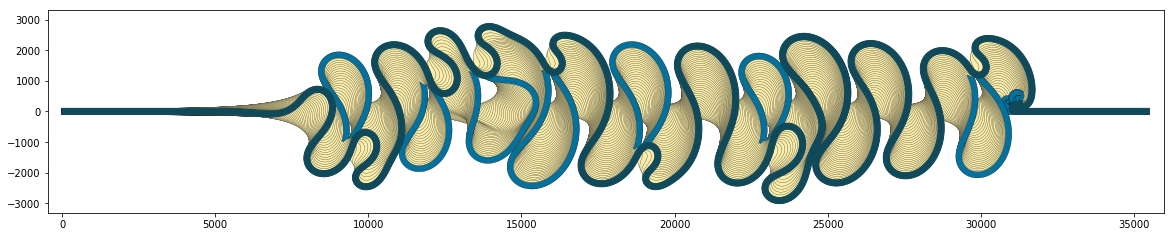

In [43]:
chb.migrate(nit,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens) # channel migration
fig = chb.plot('strat',20,60) # plotting

FloatProgress(value=1.0, max=1000.0, min=1.0)

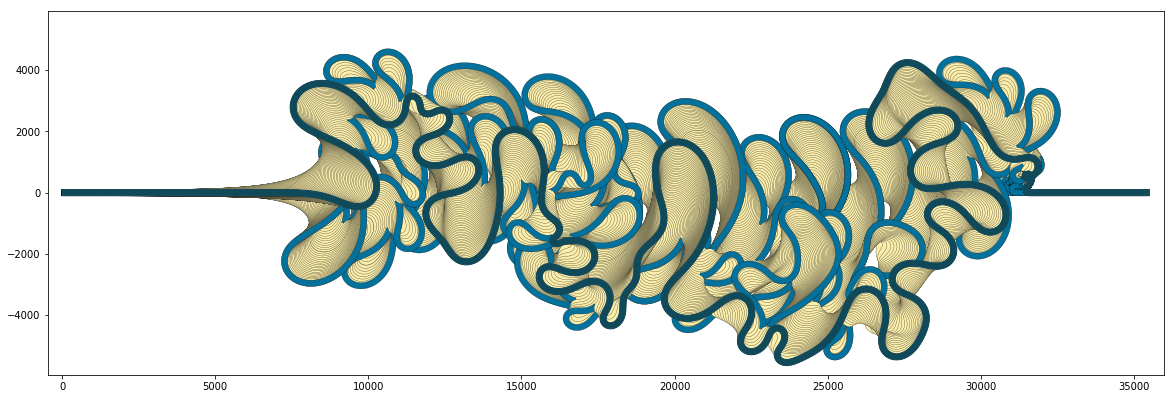

In [44]:
# migrate an additional 1000 iterations and plot results
chb.migrate(1000,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens)
fig = chb.plot('strat',20,60)

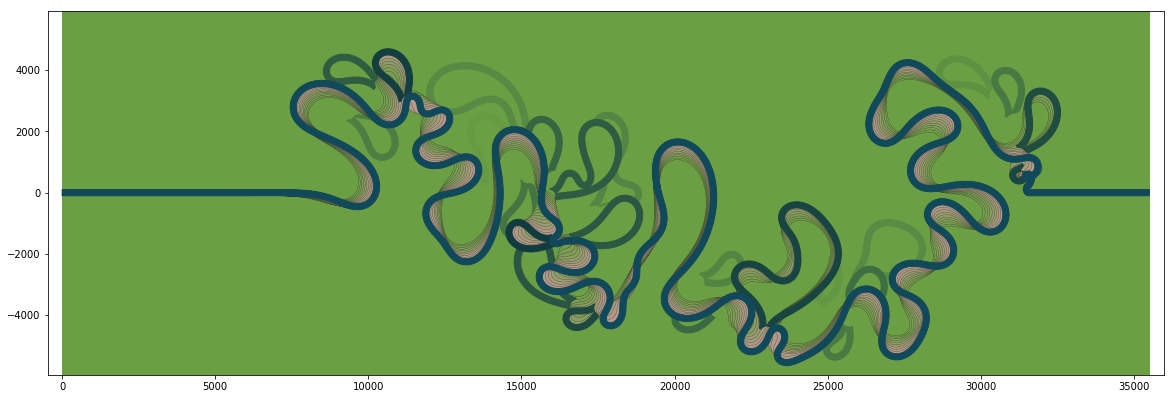

In [45]:
# plot result as 'Google Earth view'
fig = chb.plot('morph',20,60)